# Salary Analysis of BA, DA, DS, and DE
### Datasets
- https://www.kaggle.com/datasets/andrewmvd/data-scientist-jobs
- https://www.kaggle.com/datasets/andrewmvd/data-engineer-jobs
- https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs
- https://www.kaggle.com/datasets/andrewmvd/business-analyst-jobs
### Reference
- https://www.kaggle.com/code/josephgutstadt/skills-for-a-data-scientist-analyst/notebook
- **Note**: If you want to find more visualization of these datasets, please visit [BA, DA or DS? Plotly tells you](https://www.kaggle.com/code/seanzhang1997/ba-da-or-ds-plotly-tells-you)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import networkx as nx 

from constant import *
from analysis import *

## 資料合併：將四份檔案合併成一份檔案
- Concatenate four csv data, create Job Category column to distinguish them.
- Extract salary lower-bound and upper-bound from salary estimation string.
- Drop the data misplaced column-wise in BusinessAnalyst.csv.
- Extract job level from Job Description column (while the amount of these label is quite less, may not be a good feature)

In [9]:
df_merge.head()

,Job Category,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower,Salary Upper,Senior Level,Mid Level,Junior Level
0,DataScientist,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,...,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1,111.0,181.0,True,False,False
1,DataScientist,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,...,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1,111.0,181.0,False,False,False
2,DataScientist,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,...,-1,-1,Unknown / Non-Applicable,-1,True,111.0,181.0,False,False,False
3,DataScientist,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,...,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1,111.0,181.0,False,False,False
4,DataScientist,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1,111.0,181.0,False,False,False


In [10]:
## The misplaced data, which their value cannot match each column.
df_misplace.head()

,Job Category,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Salary Lower,Salary Upper
6058,DataAnalyst,Configuration/Data Management Analyst III,-1,Job Description\nPosition Title: Configuration...,4.4,Protingent\n4.4,"Kent, WA","Bellevue, WA",51 to 200 employees,2001,Company - Private,Staffing & Outsourcing,Business Services,$25 to $50 million (USD),-1,-1,NaN,NaN
12382,BusinessAnalyst,Business Analyst - Loan IQ Specialist\n\n\nJac...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia,...",-1,NaN,NaN,NaN,NaN
12383,BusinessAnalyst,Job Summary\n\nWorks daily to resolve complex ...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN,NaN,NaN
12384,BusinessAnalyst,Job Summary\nSupports the Train and Engine (T&...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1,NaN,NaN,NaN,NaN
12385,BusinessAnalyst,SUMMARY\n\nThe Software Quality Assurance (SQA...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1,NaN,NaN,NaN,NaN


## Skill Type Analysis
- Inspired by https://www.kaggle.com/code/josephgutstadt/skills-for-a-data-scientist-analyst/notebook.
- **We assume the dictionary we use for vectoring is representative enough.**
- Use tf-idf to be one of the feature to predict later-on.
- Skill type summary needed in job description.
- As for Apriori algorithm, since the ability of skill types of each category of job can be different, we revised the concept of support and confidence based on probability each term exist in whole dataset. We define:
    - skill importance for each job cat: proportion of each skill type occurrence for all skills.
    - confidence(A->B)= P(A^B)/P(A), (same as Apriori).
- Perform radar plot of skill importance for each Job Category.
- Comparing multiple radar plot in ranking by normalizing the skill importance value.
- Perform network graph of each Job Category.

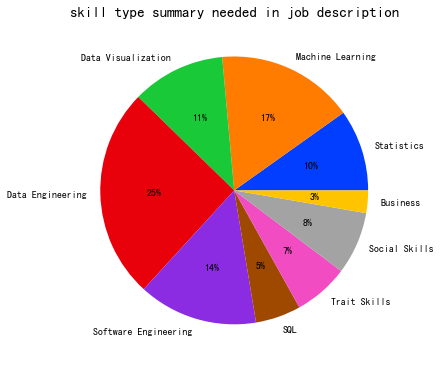

In [2]:
## skill type summary needed in job description
plt.figure(figsize=(6, 8))
plt.pie(skill_df.sum(), labels=skill_types.keys(), colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.title('skill type summary needed in job description', fontsize=15)
plt.show()

In [3]:
## Radar plot by skill importance
for row in job_skill_importance.index:
    radar_plot(df=job_skill_importance, row=row)

In [2]:
radar_plot_compare(df=job_skill_importance)

### Understanding Radar Plot
- Among personality skills such as Business, Social Skills, and Trait Skills, Business Analyst gets the highest rank, representing the interpersonal relationship a BA should hold.
- A Data Scientist performs more Social Skills comparing to Date Engineer, while the later needs more SQL domain to support itself.

In [3]:
## normorlizing each skill type by each max should be more understanderable when comparing job cat
radar_plot_compare(df=job_skill_importance_norm)

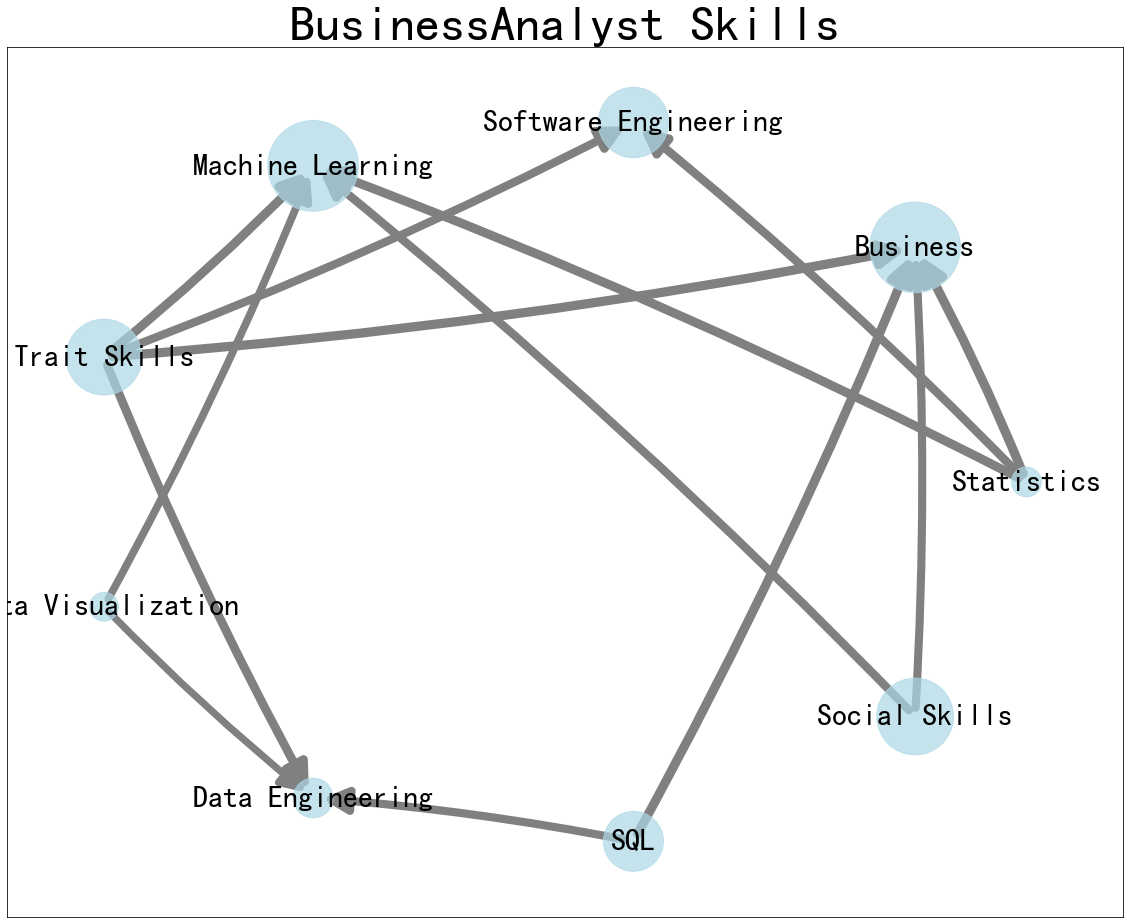

In [4]:
## network graph of each Job Category
job_skill_graph(job_cats[0])

### Understanding network graph
Noted that there should be n(n+1)/2 of confidence among n nodes, we pick top two largest edges to represent each node.
- Node size: skill importance. The larger, the more importance of the skill set among the Job.
- Arrow: confidence(A->B) between skill A and B. The larger arrow size is, the larger the confidence value.

We can see that Software Engineering skills and Data Engineering skills usually gets the most confidence among other skills, representing they are mentioned really frequently with other skills.  

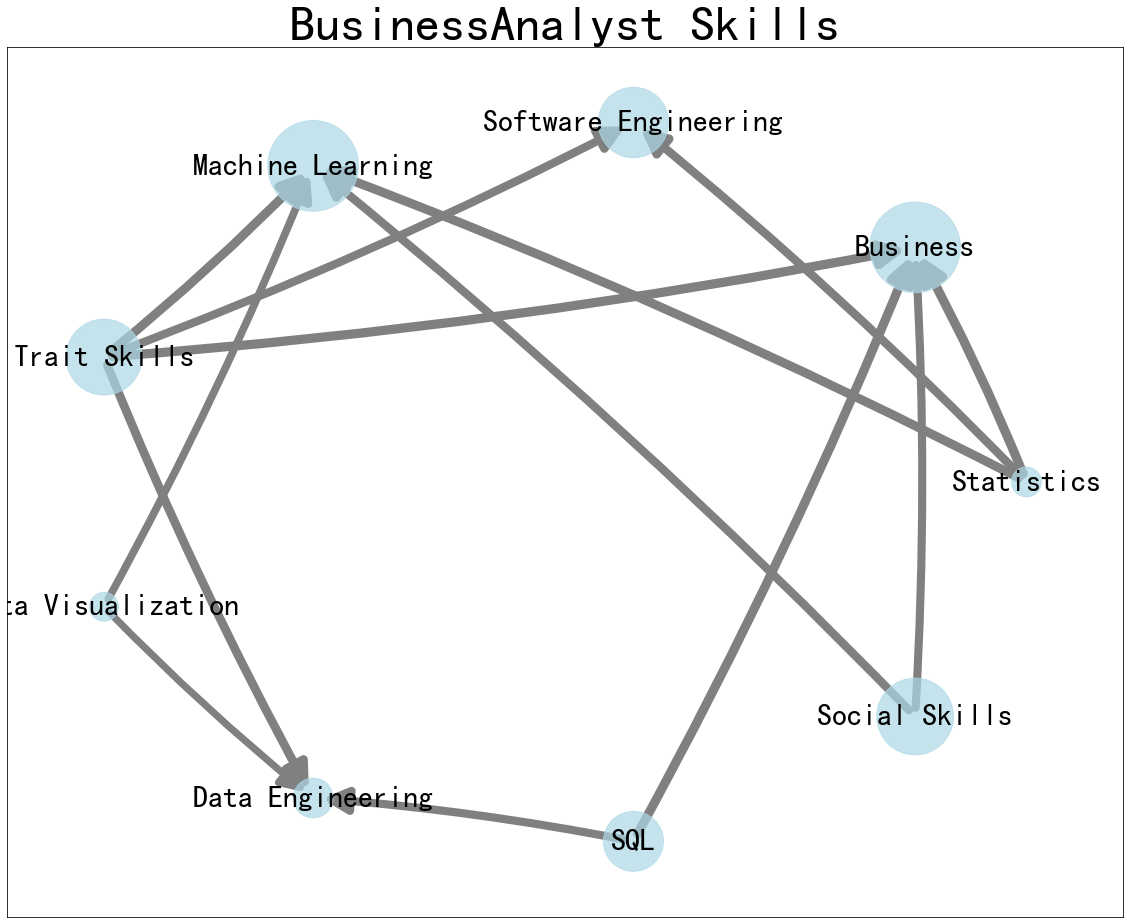

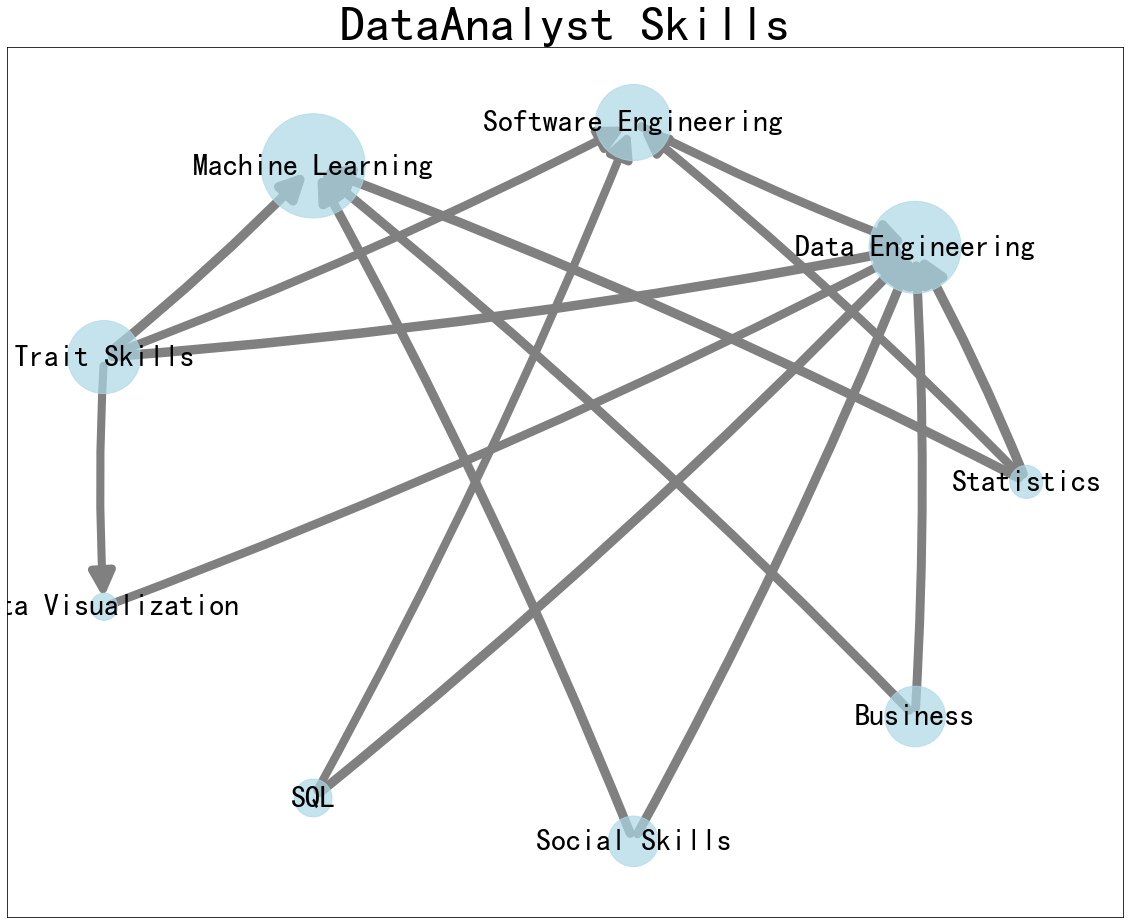

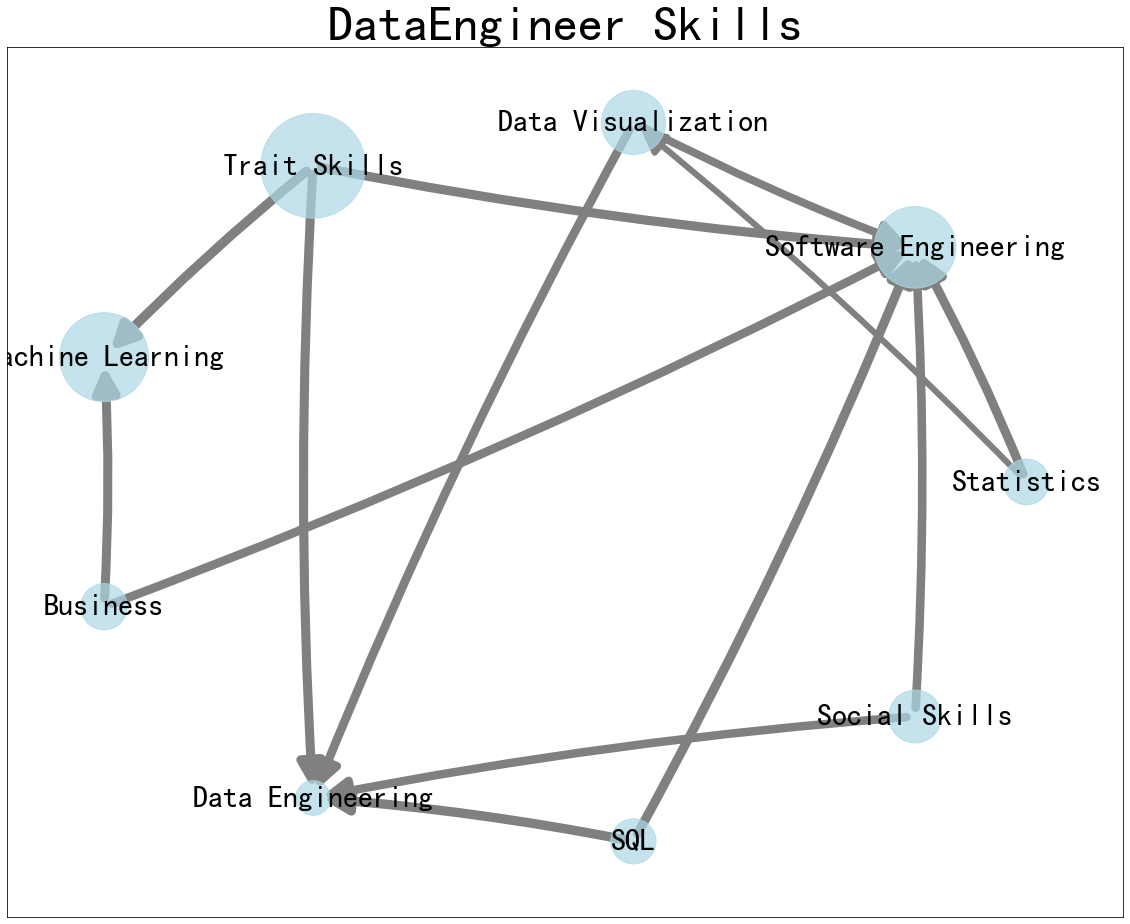

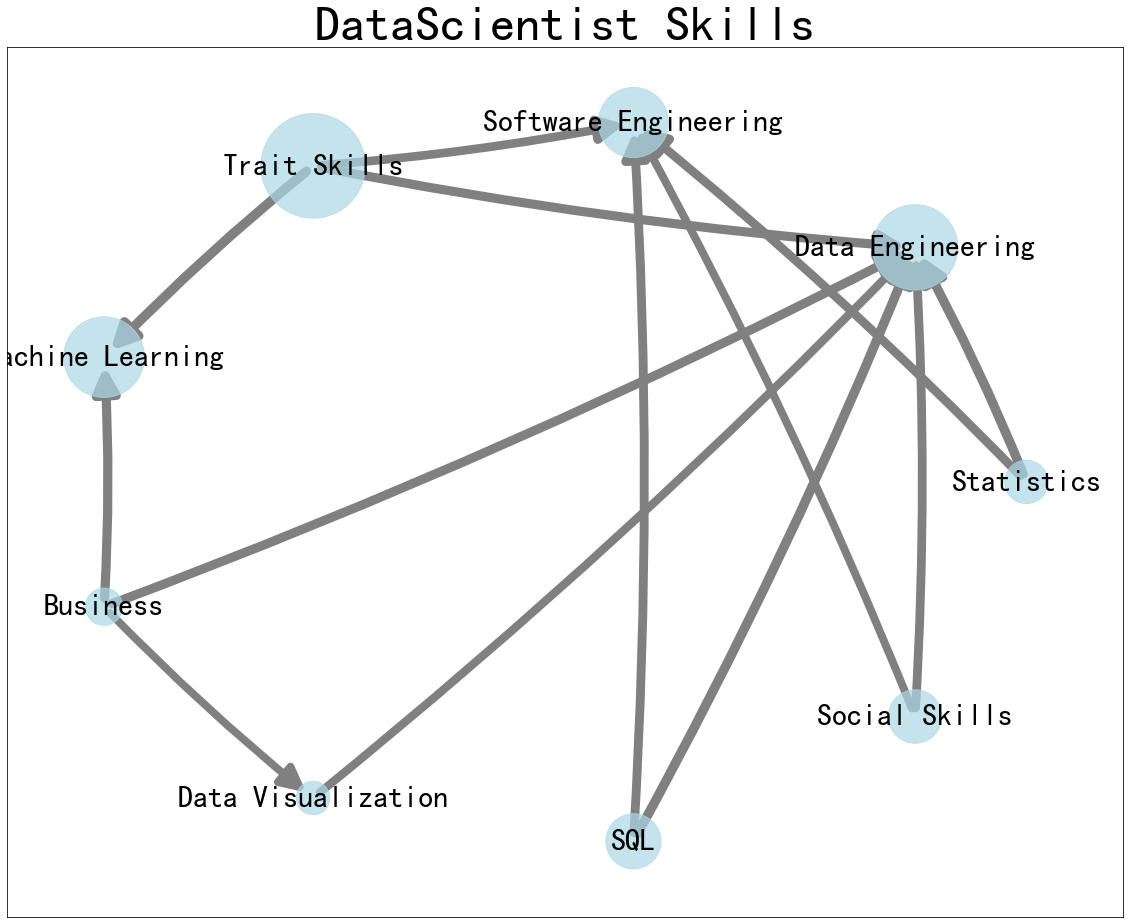

In [5]:
for cat in job_cats:
    job_skill_graph(cat)

## Salary Range Prediction (XGBoost)
- We use two models to predict Salary Lower bound and Upper bound each. And can retrieve feature importance factor each.
- Feature engineering by td-idf.
- Since most of the features are range in [0, 1], we normalize the y to get a better mapping, and evaluated in MAPE (Mean Absolute Percentage Error)

In [6]:
mape_lower

0.10684915772788363

In [7]:
mape_upper

0.039692663002741164

In [8]:
feature_importances_transform(model=model_lower)

,Feature,Importance
133,Job Category_DataEngineer,0.062075
132,Job Category_DataAnalyst,0.058254
134,Job Category_DataScientist,0.044636
10,excel,0.036049
1,data robot,0.032158
109,cplusplus,0.031013
108,hive,0.029589
128,team,0.025342
103,aws,0.024088
110,redshift,0.023500


In [9]:
feature_importances_transform(model=upper_model)

,Feature,Importance
133,Job Category_DataEngineer,0.082570
132,Job Category_DataAnalyst,0.053845
10,excel,0.042239
108,hive,0.038037
1,data robot,0.037314
134,Job Category_DataScientist,0.033687
100,powerpoint,0.026894
115,caffe,0.025784
17,css,0.022533
128,team,0.021502


In [10]:
df_merge.to_csv('merged_df.csv', index=False)